In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('loan_tap.csv')

In [3]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


1. Define problem statement and perform Exploratory Data Analysis 
problem statement:- we have given a set of attributes for an Individual, and we have to determine if a credit line should be extended to them.
If so, what should the repayment terms be in business recommendations?



In [4]:
#a. Observations on shape of data and data types of all attributes
df.shape

(396030, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
#b. Check for missing value (if any)
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [7]:
#c. Display the statistical summary
df.describe()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


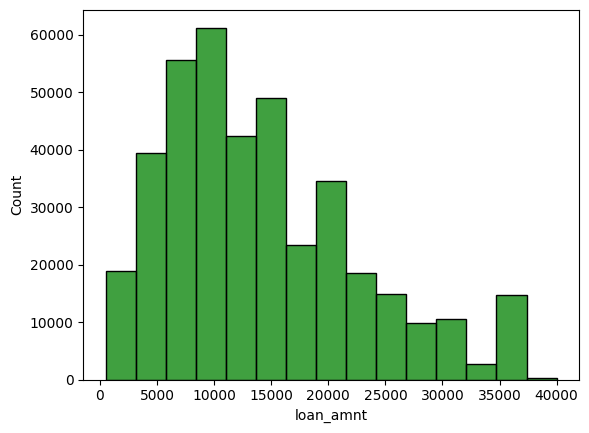

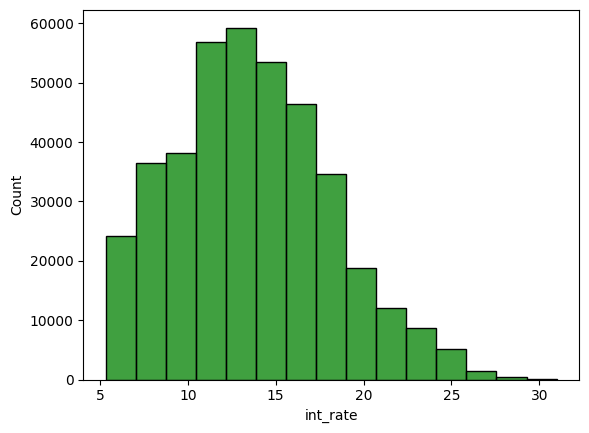

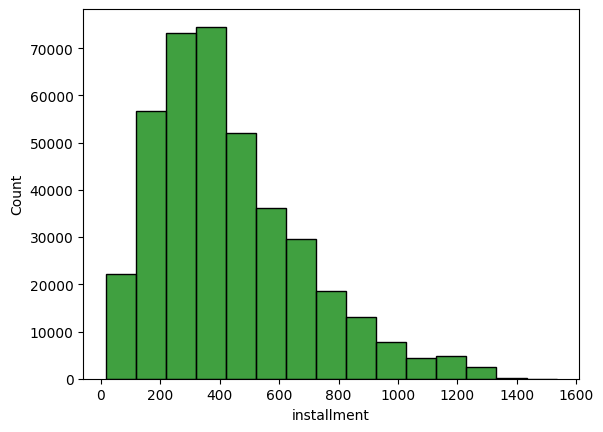

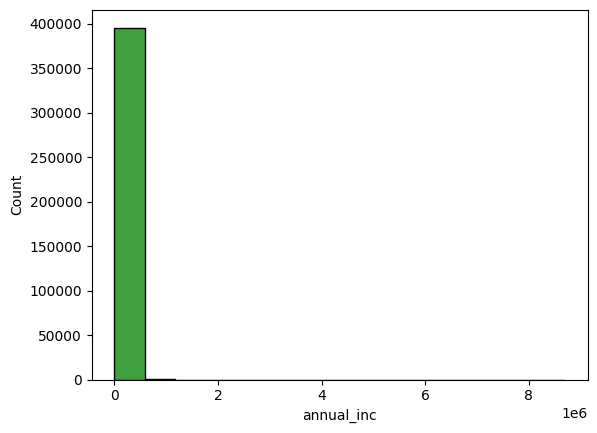

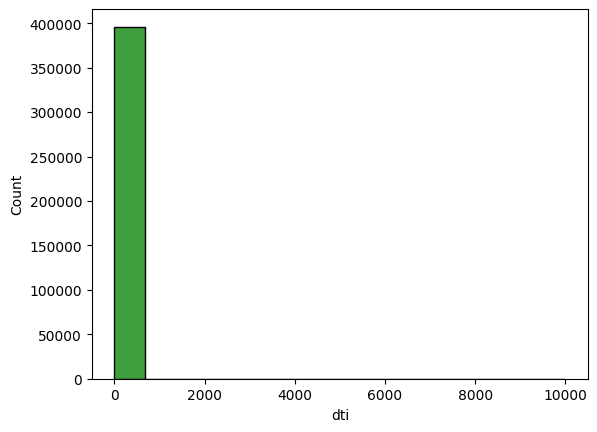

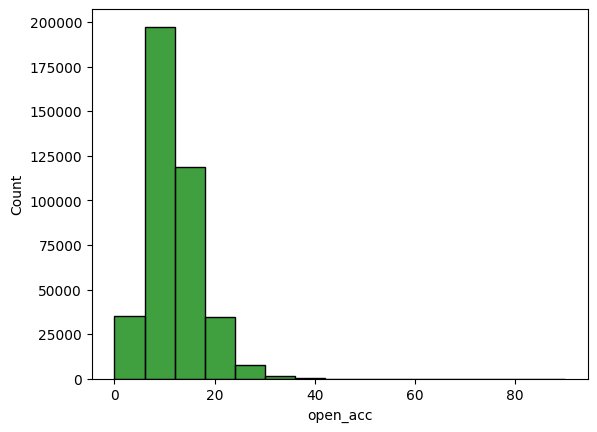

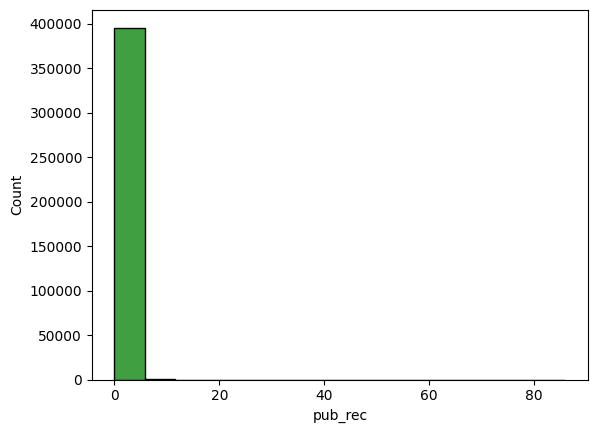

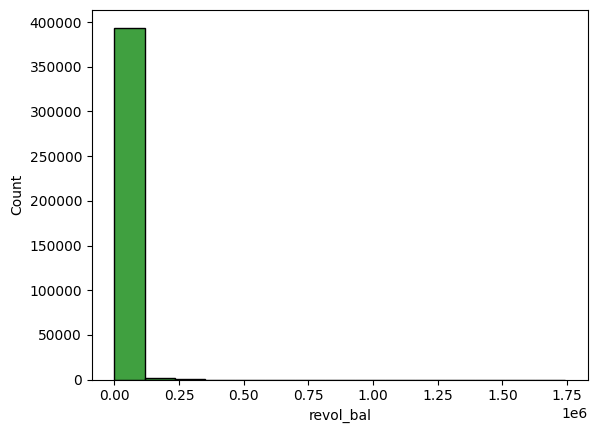

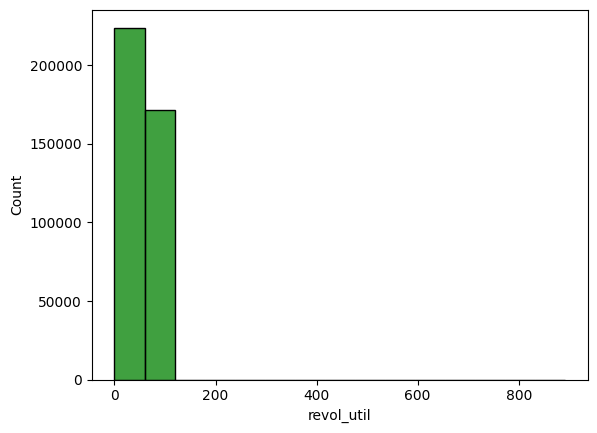

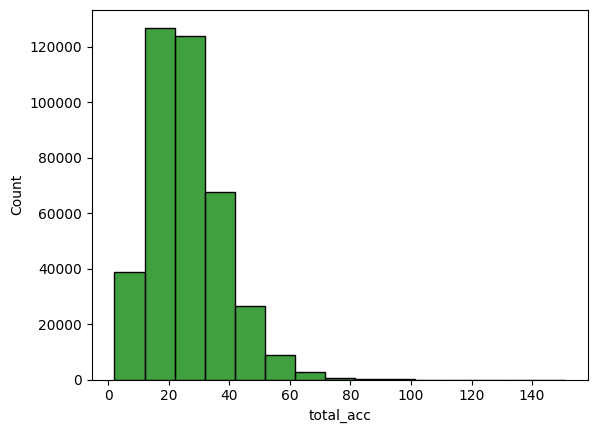

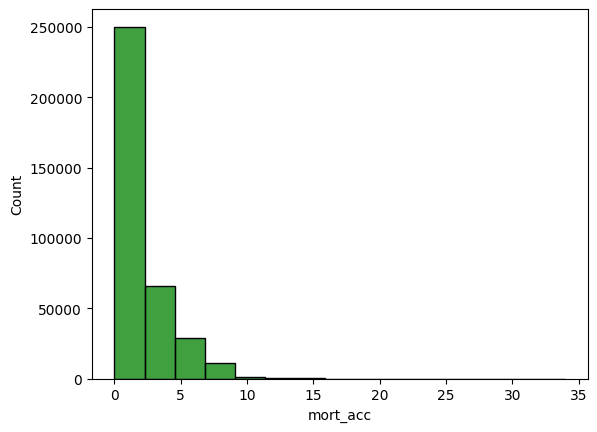

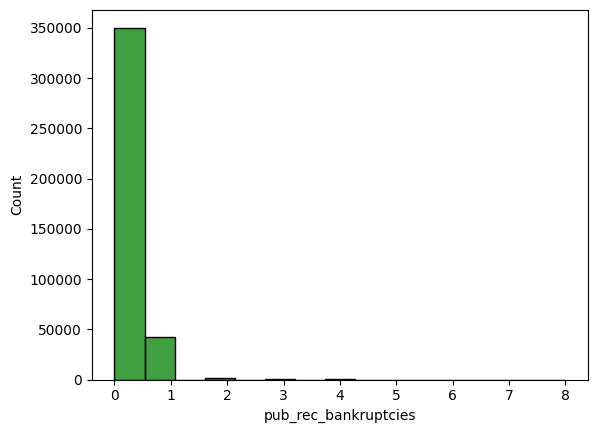

In [8]:
#d. Univariate Analysis and Bivariate Analysis of all the attributes
df_numeric=df.select_dtypes(include='float64')
df_numeric
for i in df_numeric:
    sns.histplot(x=df_numeric[i],bins=15, color='green')
    plt.show()


In [9]:
cat_col=df.select_dtypes(include='object')
cat_col

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,licensed bankere,2 years,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,36 months,C,C1,Agent,5 years,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,36 months,B,B1,City Carrier,10+ years,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,60 months,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [10]:
cat_col.nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              173105
emp_length                 11
home_ownership              6
verification_status         3
issue_d                   115
loan_status                 2
purpose                    14
title                   48816
earliest_cr_line          684
initial_list_status         2
application_type            3
address                393700
dtype: int64

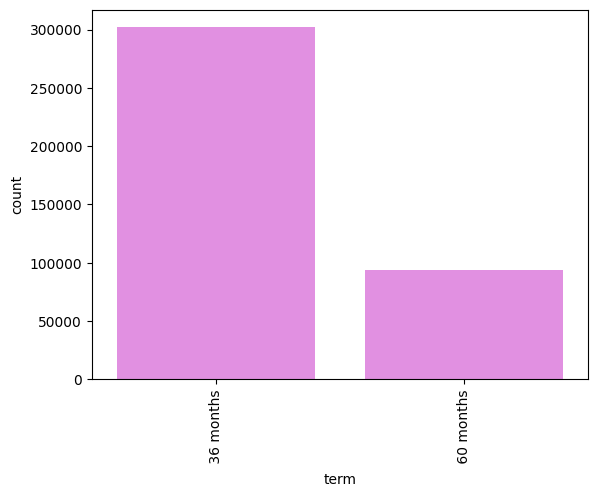

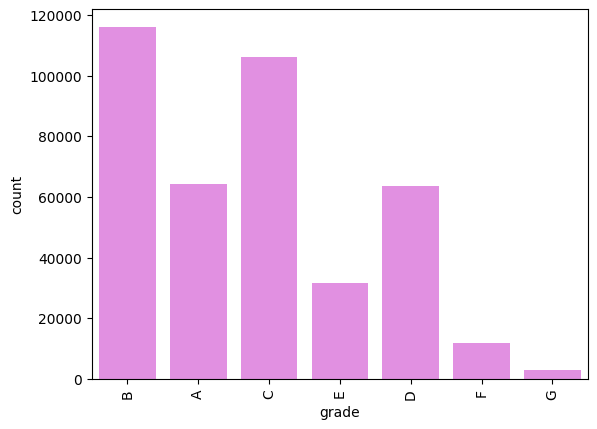

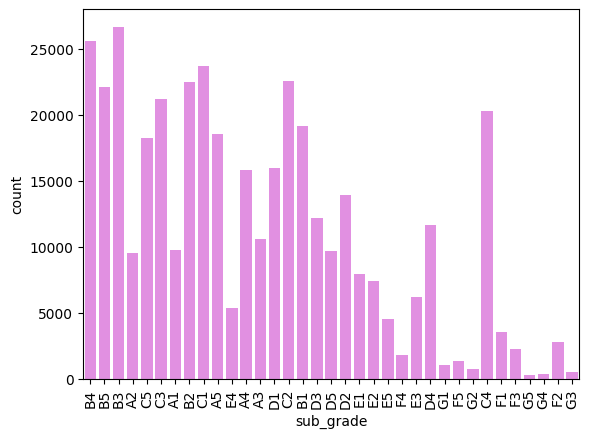

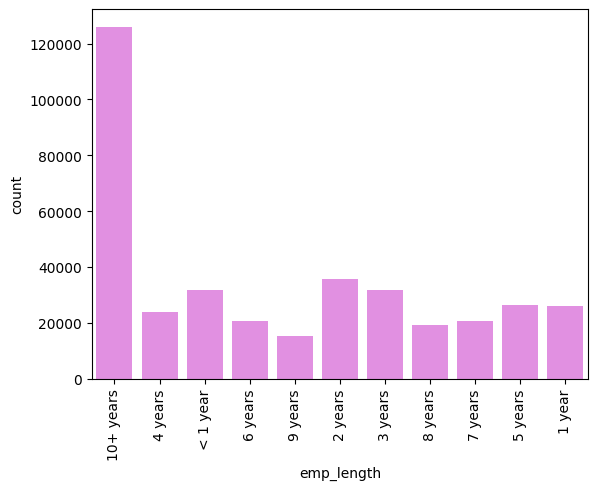

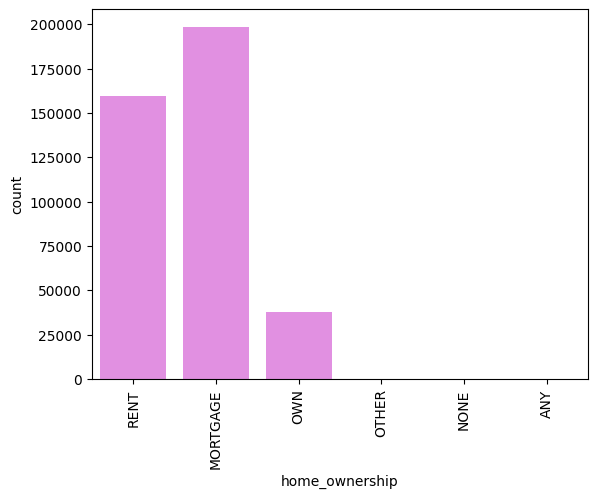

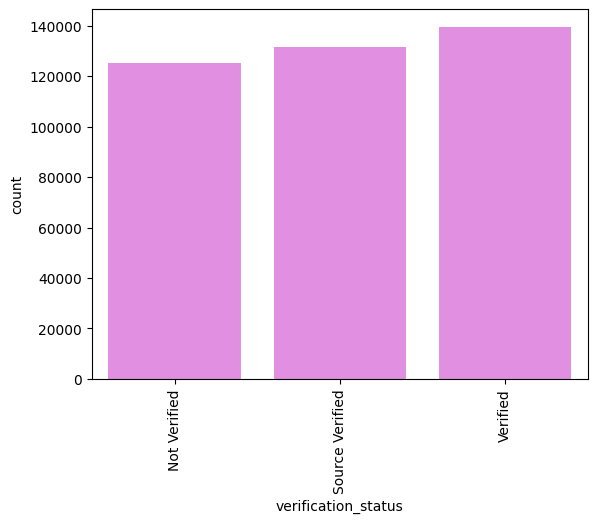

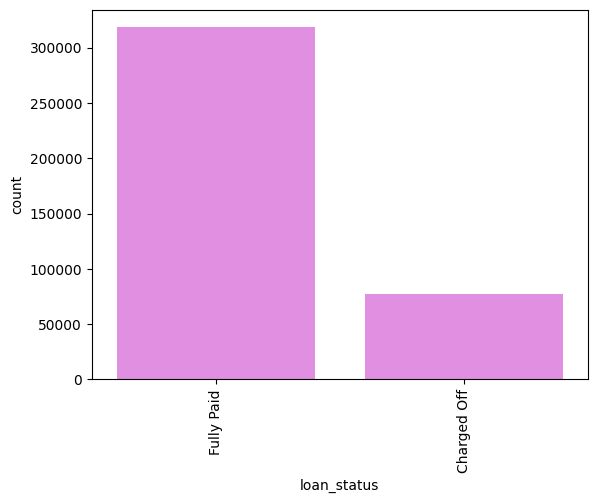

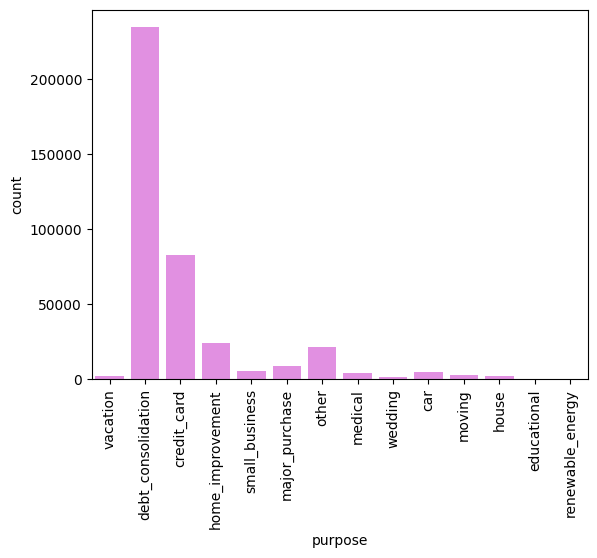

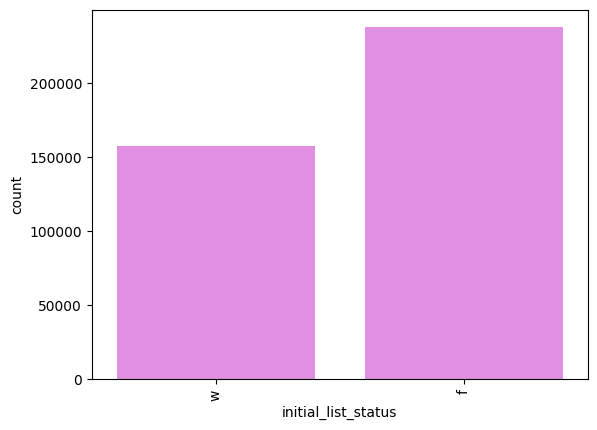

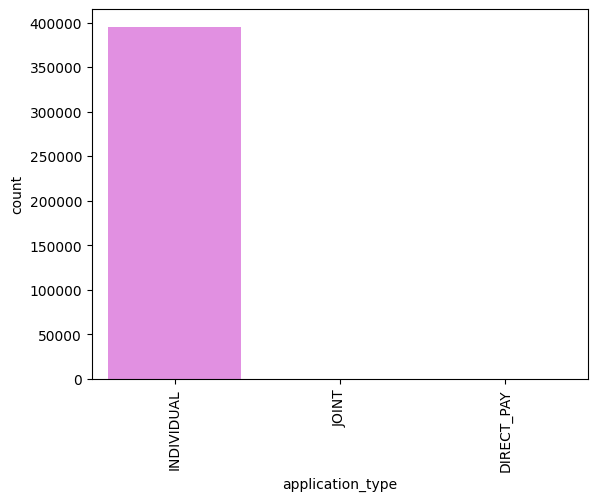

In [11]:
#for categorical columns
for i in cat_col.columns.drop(['emp_title','title','earliest_cr_line','address','issue_d']):
    sns.countplot(x=df[i],color='violet')
    plt.xticks(rotation=90)
    plt.show()


In [73]:
#bivariate
df_num = df.drop(df.select_dtypes(include='object'), axis=1)
df_num.head(8)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0.842254,11.44,329.48,0.874270,0.861607,0.752860,0.804263,0.773378,117000.0,...,16.0,0.0,36369.0,41.8,25.0,0.799245,0.803913,0.0,0.0,0.829389
1,8000.0,0.842254,11.99,265.68,0.874270,0.844963,0.782678,0.807615,0.830439,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0.806940,0.803913,3.0,0.0,0.829389
2,15600.0,0.842254,10.49,506.97,0.874270,0.876646,0.808007,0.793128,0.773378,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0.806940,0.803913,0.0,0.0,0.829389
3,7200.0,0.842254,6.49,220.65,0.937121,0.951814,0.829389,0.810806,0.773378,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0.806940,0.803913,0.0,0.0,0.829389
4,24375.0,0.680585,17.27,609.33,0.788191,0.754933,0.699281,0.799530,0.830439,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0.806940,0.803913,1.0,0.0,0.699281
5,20000.0,0.842254,13.33,677.07,0.788191,0.781584,0.793339,0.804263,0.830439,86788.0,...,8.0,0.0,25757.0,100.6,23.0,0.806940,0.803913,4.0,0.0,0.829389
6,18000.0,0.842254,5.32,542.07,0.937121,0.971323,0.849270,0.806738,0.830439,125000.0,...,8.0,0.0,4178.0,4.9,25.0,0.806940,0.803913,3.0,0.0,0.829389
7,13000.0,0.842254,11.14,426.47,0.874270,0.891487,0.810503,0.804263,0.773378,46000.0,...,11.0,0.0,13425.0,64.5,15.0,0.806940,0.803913,0.0,0.0,0.829389


In [13]:
df_num.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


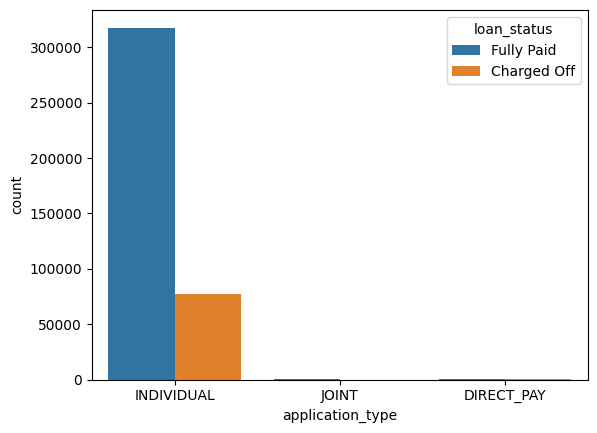

In [14]:
sns.countplot(x=df['application_type'],hue=df['loan_status'])
plt.show()

<Axes: xlabel='verification_status', ylabel='count'>

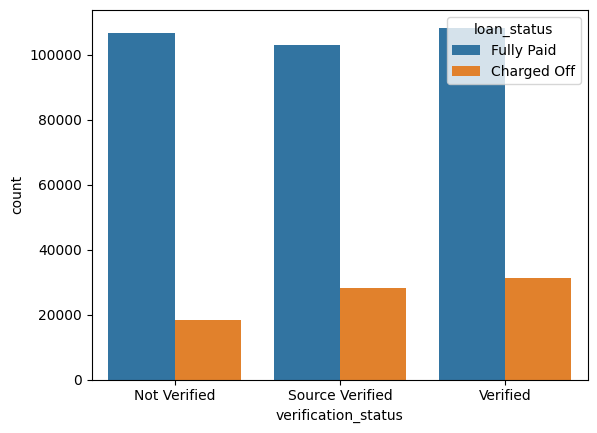

In [15]:
sns.countplot(x=df['verification_status'],hue=df['loan_status'])

<Axes: xlabel='loan_amnt', ylabel='total_acc'>

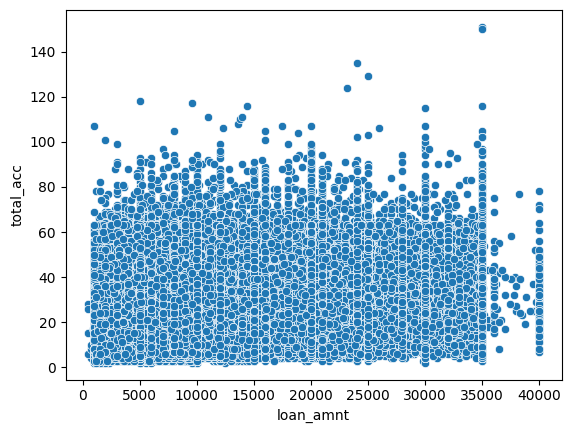

In [16]:
sns.scatterplot(x=df['loan_amnt'],y=df['total_acc'])

#Comments:
#a. On range of attributes-
the range of attributes in this dataset gives us an idea about the variation in values of numerical columns like loan_amt, int_rate,annual_inc as well as categorical
columns like home_ownership and loan_status,This helps us to find errors and detect outliers and build accurate models. 




#b. Outliers of various attributes-
outliers are basicallly those values which are out of normal range,they give us errors and also effects models accuracy and model became bias,we need to check and
treat outliers to reduce noise.



#c.On the distribution of the variables and relationship between them-
the distribution of numerical columns like loan_amnt, annual_inc is mostly on the lower side but some outliers stand out and categorical columns are devided into
classes,we can see different patterns and  relationship between them (high loan means more bigger installments) by making different plots which helps us to give
more clear understanding of data and also helps us in preprocessing.






2. Data Preprocessing (30 Points)


In [18]:
#a. Duplicate value check
duplicate =df.duplicated().sum()
print(duplicate)

0


In [19]:
#b. Missing value treatment
df['emp_title'].fillna('no title',inplace=True) 

In [20]:
df['emp_title'].isna().sum()

np.int64(0)

In [21]:
mod=df['emp_length'].mode()[0]
mod

'10+ years'

In [22]:
df['emp_length'].fillna(mod,inplace=True)

In [23]:
df['emp_length'].isna().sum()

np.int64(0)

In [24]:
mode2=df['title'].mode()[0]
mode2

'Debt consolidation'

In [25]:
df['title'].fillna(mode2,inplace=True)

In [26]:
df['title'].isna().sum()

np.int64(0)

In [27]:
mean=df['revol_util'].mean()

In [28]:
df['revol_util'].fillna(mean,inplace=True)

In [29]:
df['revol_util'].isna().sum()

np.int64(0)

In [30]:
df['mort_acc'].fillna(df['mort_acc'].mean(),inplace=True)

In [31]:
df['mort_acc'].isna().sum()

np.int64(0)

In [32]:
df['pub_rec_bankruptcies'].isna().sum()

np.int64(535)

In [33]:
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mean(),inplace=True)

In [34]:
df['pub_rec_bankruptcies'].isna().sum()

np.int64(0)

c. Outlier treatment


In [35]:
#taking out outliers
df_numeric=df.select_dtypes(include='float64')
df_numeric

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.000000,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.000000,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.000000,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.000000,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.000000,0.0
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1.000000,0.0
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.000000,0.0
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,5.000000,0.0


In [36]:
#no missing values
df.isna().sum()


loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

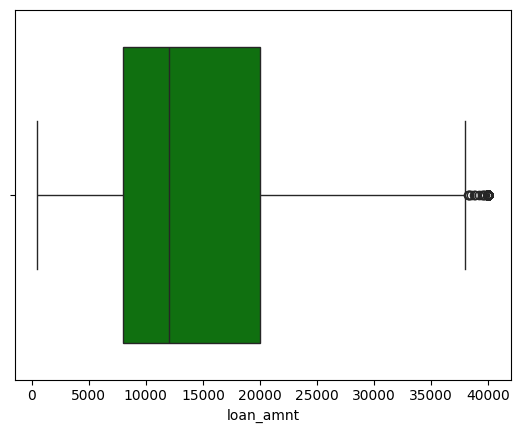

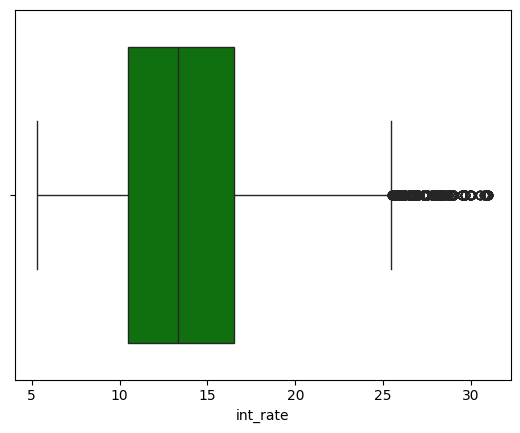

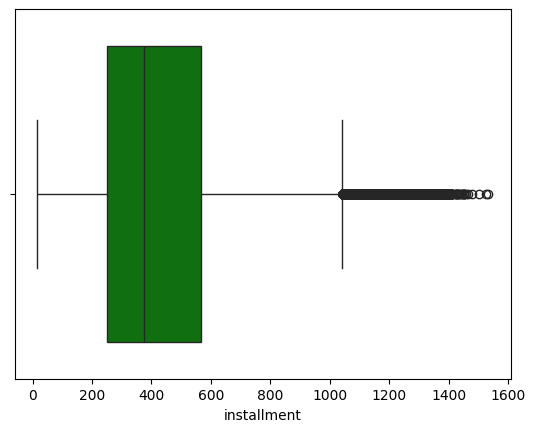

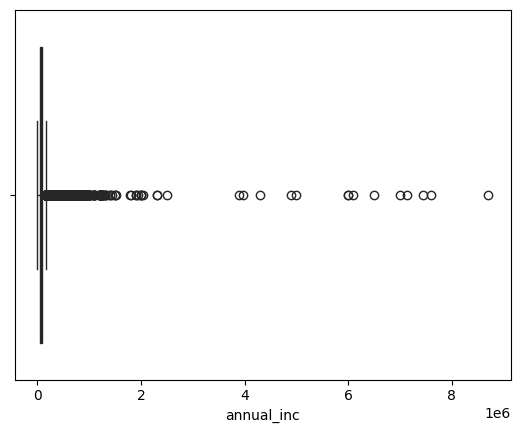

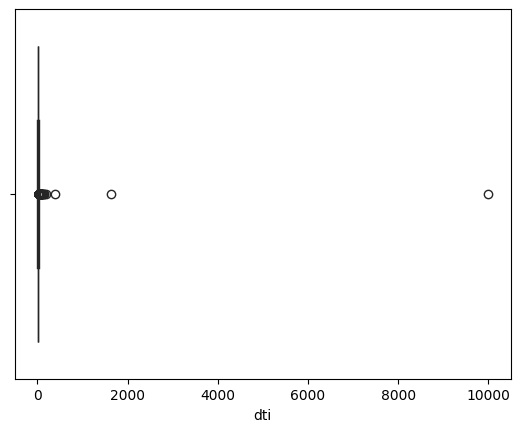

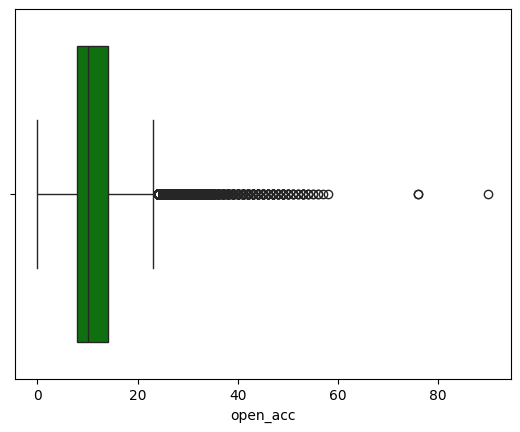

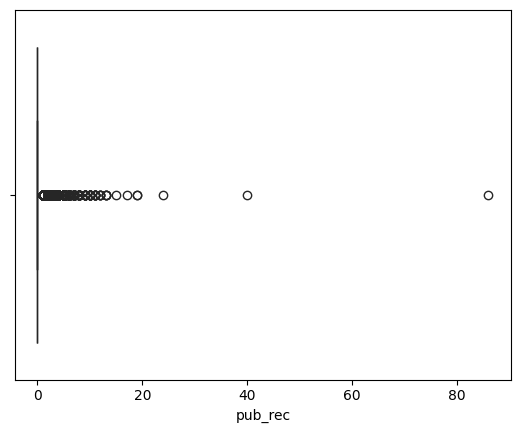

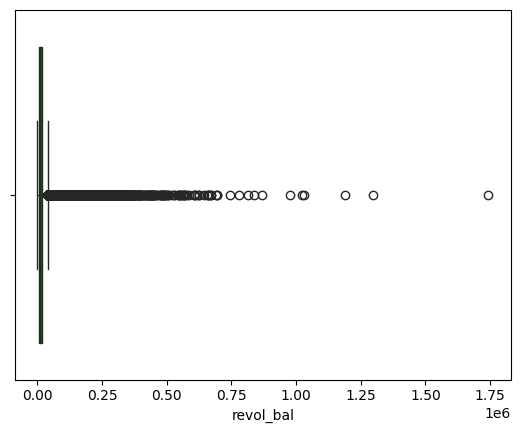

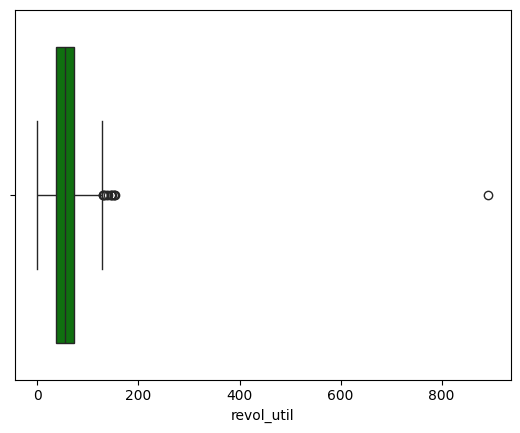

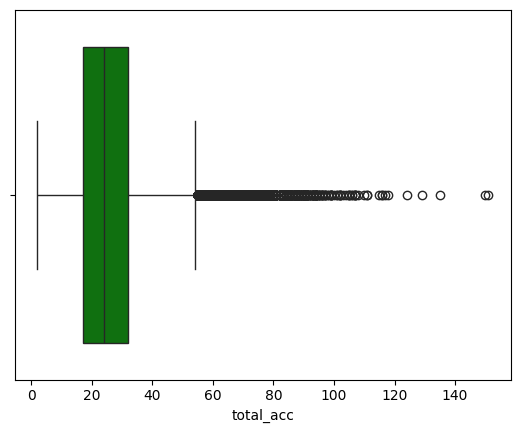

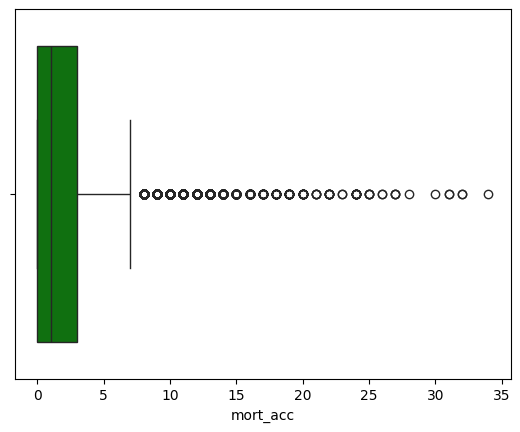

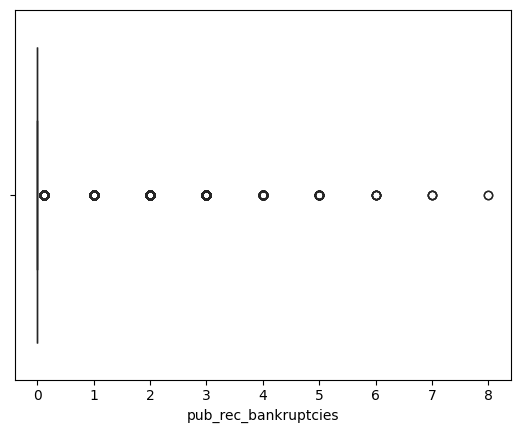

In [37]:
for i in df_numeric:
    sns.boxplot(x=df_numeric[i],color='green')
    plt.show()


In [38]:
#treating outliers
# calculate IQR for column Height
def outlier(df_numeric):
    for i in df_numeric.columns:
        Q1 = df_numeric[i].quantile(0.25)
        Q3 = df_numeric[i].quantile(0.75)
        IQR = Q3 - Q1
        threshold = 1.5
        lower_bound= Q1-threshold* IQR
        upper_bound= Q3+threshold* IQR
        df_numeric[i]=df_numeric[i].clip(lower=lower_bound,upper=upper_bound)
    return df_numeric


d. Encoding categorical columns


In [39]:
df['loan_status'] = df['loan_status'].apply(lambda x:1 if x=='Fully Paid' else 0)

In [40]:
df['loan_status'].head()

0    1
1    1
2    1
3    1
4    0
Name: loan_status, dtype: int64

In [41]:
from category_encoders import TargetEncoder
cat_col=df.select_dtypes(include=['object'])
for i in cat_col:
    encoder = TargetEncoder(cols=[i])
    df[i] = encoder.fit_transform(df[i],df['loan_status'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  float64
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  float64
 5   sub_grade             396030 non-null  float64
 6   emp_title             396030 non-null  float64
 7   emp_length            396030 non-null  float64
 8   home_ownership        396030 non-null  float64
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  float64
 11  issue_d               396030 non-null  float64
 12  loan_status           396030 non-null  int64  
 13  purpose               396030 non-null  float64
 14  title                 396030 non-null  float64
 15  







e. Check for imbalance dataset and balancing it.







In [43]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
y_train.value_counts()

loan_status
1    254728
0     62096
Name: count, dtype: int64

In [48]:
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train,y_train)


In [49]:
y.unique()

array([1, 0])

###f. Scaling 

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

####3. Model building




In [52]:
#a. Build the Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [53]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [54]:
y_pred = log_reg.predict(x_test)

In [55]:
print(log_reg.score(x_train_scaled, y_train))
print(log_reg.score(x_test_scaled, y_test))

0.693738026443893
0.6313410600207054


In [56]:
#b. Display model coefficients with column names

coefficients=log_reg.coef_[0].tolist()
coefficients

[-8.385529664926256e-05,
 0.0024565131783545148,
 -0.06068361638537847,
 0.002382476472597195,
 0.003951616755187154,
 0.004051114281407474,
 0.004504646839843876,
 0.0017658473367874097,
 0.001907934349047282,
 5.63709011373542e-06,
 0.002006590470985231,
 0.0024058273240733954,
 0.00189569938106195,
 0.00266210455141379,
 -0.029560484046677816,
 0.0018863041658323896,
 -0.003917196241359349,
 -0.0011987232563168318,
 4.163623103100545e-07,
 0.005480130240631982,
 0.0304073645139657,
 0.0017647393798636496,
 0.0017680928395899707,
 0.012260892818850615,
 -0.00019787345459730115,
 0.006965699454947014]

In [57]:
col_names=(df.columns)
col_names

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [58]:
coef_dict = dict(zip(col_names, coefficients))
print(coef_dict)


{'loan_amnt': -8.385529664926256e-05, 'term': 0.0024565131783545148, 'int_rate': -0.06068361638537847, 'installment': 0.002382476472597195, 'grade': 0.003951616755187154, 'sub_grade': 0.004051114281407474, 'emp_title': 0.004504646839843876, 'emp_length': 0.0017658473367874097, 'home_ownership': 0.001907934349047282, 'annual_inc': 5.63709011373542e-06, 'verification_status': 0.002006590470985231, 'issue_d': 0.0024058273240733954, 'loan_status': 0.00189569938106195, 'purpose': 0.00266210455141379, 'title': -0.029560484046677816, 'dti': 0.0018863041658323896, 'earliest_cr_line': -0.003917196241359349, 'open_acc': -0.0011987232563168318, 'pub_rec': 4.163623103100545e-07, 'revol_bal': 0.005480130240631982, 'revol_util': 0.0304073645139657, 'total_acc': 0.0017647393798636496, 'initial_list_status': 0.0017680928395899707, 'application_type': 0.012260892818850615, 'mort_acc': -0.00019787345459730115, 'pub_rec_bankruptcies': 0.006965699454947014}


####4. Results Evaluation


#a. Confusion Matrix and comments 
#comments:-
Confusion Matrix tells us about the performance of a model by comparing actual and predicted values,
this confusion matrix shows that the model performs well in correctly predicting the positive class but has a high number of false negatives which might
can effect the models accuracy 






In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[10776,  4801],
       [30246, 33383]])

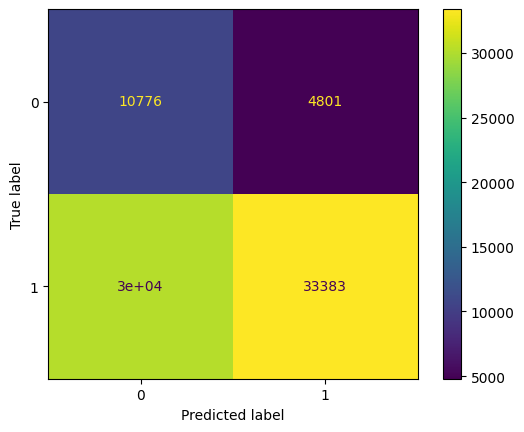

In [61]:
ConfusionMatrixDisplay(conf_mat).plot()

#b. Classification Report and comments
#comments:-
the classification report shows strengths and weaknesses of the model's perfomance,formance.
The model performs well on class 1 which is positive class than for class 0  which is negative class. This imbalancing in data shows that the model is
more biased towards the positive class






In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.69      0.38     15577
           1       0.87      0.52      0.66     63629

    accuracy                           0.56     79206
   macro avg       0.57      0.61      0.52     79206
weighted avg       0.75      0.56      0.60     79206



#c. AU-ROC Curve & comments 
#comments:-
the AU-ROC curve evaluates the model's ability to distinguish between the positive and negative classes across different thresholds.
the curve shows the TPR on the y-axis and the FPR on the x-axis,an ideal models curve indicates high TPR and low FPR at most thresholds
the closer the curve to the diagonal line, the more the model behaves like random guessing,
this curve lies above the diagonal which indicates that the model performs better than random guessing



In [65]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
probability = log_reg.predict_proba(x_test)
probability

array([[0.61372123, 0.38627877],
       [0.71262752, 0.28737248],
       [0.65202194, 0.34797806],
       ...,
       [0.47424342, 0.52575658],
       [0.53317203, 0.46682797],
       [0.57312513, 0.42687487]])

In [66]:
probabilites = probability[:,1]
probabilites

array([0.38627877, 0.28737248, 0.34797806, ..., 0.52575658, 0.46682797,
       0.42687487])

In [67]:
fpr, tpr, thr = roc_curve(y_test,probabilites)

In [68]:
print(f'FPR:\n {fpr}\n\n\n')
print(f'TPR:\n {tpr}\n\n\n')
print(f'Threshold:\n {thr}')

FPR:
 [0.00000000e+00 6.41972138e-05 6.41972138e-05 ... 9.99935803e-01
 1.00000000e+00 1.00000000e+00]



TPR:
 [0.00000000e+00 1.57161043e-05 9.42966258e-05 ... 9.99968568e-01
 9.99968568e-01 1.00000000e+00]



Threshold:
 [       inf 1.         0.99998478 ... 0.05565067 0.05372517 0.01563934]


In [69]:
roc_auc_score(y_test,probabilites)

np.float64(0.6552818833534475)

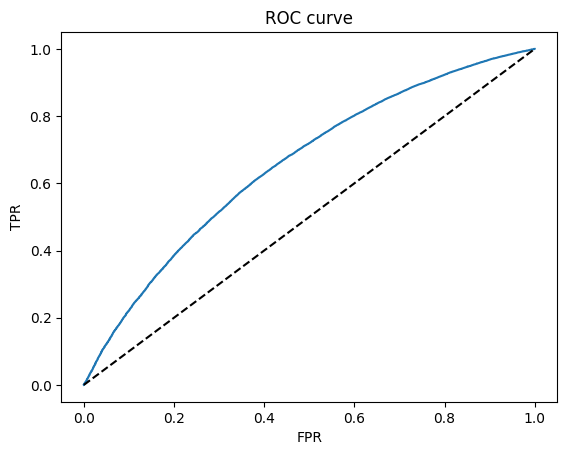

In [70]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr,'--', color='black')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

#d. Precision Recall Curve & comments
comments:-
precision- out of all the positve class how many are correctly predicted by the model,
recall-out of all actual positive class how many are correctly predicted by the model,
this value 0.87 shows that the model performs well in balancing precision and recall.





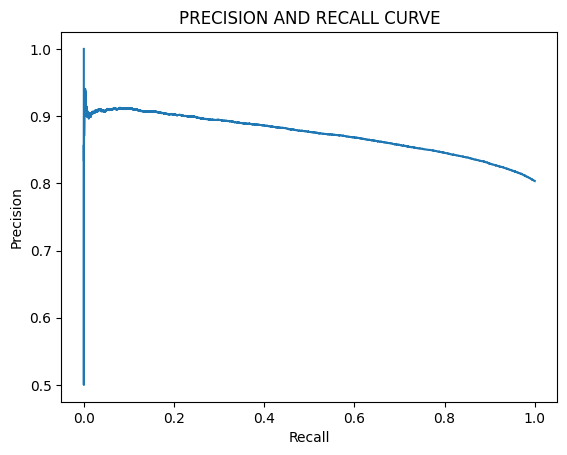

In [78]:
from sklearn.metrics import precision_recall_curve

precision, recall, thr = precision_recall_curve(y_test, probabilites)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PRECISION AND RECALL CURVE')
plt.show()

In [79]:
auc(recall, precision)

np.float64(0.8727761395429284)